# New models and dataframe - now updated until week 15

In [1]:
import sys
sys.path.insert(0, '/Users/david/galvanize/super_liga_xg')

In [3]:
from combined_player import player_minutes_value
from scraping_tools.html_scraper import db
from mongo_to_db import create_master_df

In [4]:
import pprint
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_columns', 50)

# Player Dataframe

In [14]:
games = db['games_update'].find()
players = db.players.find()

In [15]:
final_df = player_minutes_value(games, players)

In [18]:
final_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,height,total_minutes_played,transfer_value(sterlings),transfer_value(USD)
0,19132.0,Alexander Domínguez,Squad Club Atlético Vélez Sarsfield,"Jun 5, 1987 (31)",31,right,1,22.0,"1,95 m",1080.000000,£1.58m,2.01
1,27987.0,Lucas Hoyos,Squad Club Atlético Vélez Sarsfield,"Apr 29, 1989 (29)",29,right,1,12.0,"1,83 m",180.000000,£135k,0.17
2,30896.0,Gastón Díaz,Squad Club Atlético Vélez Sarsfield,"Mar 13, 1988 (30)",30,right,2,24.0,"1,75 m",986.483333,£450k,0.57
3,94225.0,Joaquín Laso,Squad Club Atlético Vélez Sarsfield,"Jul 4, 1990 (28)",28,right,2,6.0,"1,85 m",1080.000000,£270k,0.34
4,99779.0,Luis Abram,Squad Club Atlético Vélez Sarsfield,"Feb 27, 1996 (22)",22,left,2,29.0,"1,80 m",1170.000000,£405k,0.51


In [21]:
final_df['position_id'] = final_df['position_id'].replace(1, 'Goalie')
final_df['position_id'] = final_df['position_id'].replace(2, 'Defender')
final_df['position_id'] = final_df['position_id'].replace(3, 'Midfielder')
final_df['position_id'] = final_df['position_id'].replace(4, 'Forward')
final_df['position_id'] = final_df['position_id'].replace(5, 'Defender')

In [22]:
#minutes have been updated
final_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,height,total_minutes_played,transfer_value(sterlings),transfer_value(USD)
0,19132.0,Alexander Domínguez,Squad Club Atlético Vélez Sarsfield,"Jun 5, 1987 (31)",31,right,Goalie,22.0,"1,95 m",1080.000000,£1.58m,2.01
1,27987.0,Lucas Hoyos,Squad Club Atlético Vélez Sarsfield,"Apr 29, 1989 (29)",29,right,Goalie,12.0,"1,83 m",180.000000,£135k,0.17
2,30896.0,Gastón Díaz,Squad Club Atlético Vélez Sarsfield,"Mar 13, 1988 (30)",30,right,Defender,24.0,"1,75 m",986.483333,£450k,0.57
3,94225.0,Joaquín Laso,Squad Club Atlético Vélez Sarsfield,"Jul 4, 1990 (28)",28,right,Defender,6.0,"1,85 m",1080.000000,£270k,0.34
4,99779.0,Luis Abram,Squad Club Atlético Vélez Sarsfield,"Feb 27, 1996 (22)",22,left,Defender,29.0,"1,80 m",1170.000000,£405k,0.51


# Shots Dataframe

In [9]:
games = db['games_update'].find()
shots_df = create_master_df(games)

/Users/david/galvanize/super_liga_xg/src/mongo_to_db.py:69: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  final_df = pd.concat([attach_to_df, df], axis=0, ignore_index=True)


In [10]:
#2955 shots to 3437 shots 
shots_df.head()

,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,corner_kick,shot_distance,shot_angle,assisted_shot,is_penalty_attempt,is_goal
0,448548,99779.0,6.67,0.00,1.51,-1.21,-1,0.83,22336297,11,20,1.033333,177285.0,0.89,12.44,29.36,-4.84,-1.0,-1.0,1.0,6.838786,12.755990,1.0,0.0,1
1,448548,60730.0,21.33,12.00,4.24,-0.91,-1,0.73,22336386,35,20,9.683333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.747333,11.242763,0.0,0.0,0
2,448548,177285.0,12.00,1.78,0.00,-3.03,-1,0.21,22336583,13,20,26.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.000000,0.000000,0.0,1.0,1
3,448548,185745.0,8.44,0.89,14.53,-6.66,-1,-1.00,22336723,33,20,38.883333,177285.0,22.67,6.22,3.93,19.67,-1.0,-1.0,0.0,16.803407,59.849102,1.0,0.0,0
4,448548,77892.0,22.22,0.44,13.92,-8.48,-1,-1.00,22336739,33,13,40.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.220122,32.065607,0.0,0.0,0


# Testing Models

In [29]:
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [30]:
from model_prep import create_rf_prep

In [48]:
#use later when retesting on whole dataset
model_ready = create_rf_prep(shots_df)

In [49]:
# model_ready.head()

In [50]:
shots_df.head()

,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,corner_kick,shot_distance,shot_angle,assisted_shot,is_penalty_attempt,is_goal
0,448548,99779.0,6.67,0.00,1.51,-1.21,-1,0.83,22336297,11,20,1.033333,177285.0,0.89,12.44,29.36,-4.84,-1.0,-1.0,1.0,6.838786,12.755990,1.0,0.0,1.0
1,448548,60730.0,21.33,12.00,4.24,-0.91,-1,0.73,22336386,35,20,9.683333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.747333,11.242763,0.0,0.0,0.0
2,448548,177285.0,12.00,1.78,0.00,-3.03,-1,0.21,22336583,13,20,26.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.000000,0.000000,0.0,1.0,1.0
3,448548,185745.0,8.44,0.89,14.53,-6.66,-1,-1.00,22336723,33,20,38.883333,177285.0,22.67,6.22,3.93,19.67,-1.0,-1.0,0.0,16.803407,59.849102,1.0,0.0,0.0
4,448548,77892.0,22.22,0.44,13.92,-8.48,-1,-1.00,22336739,33,13,40.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.220122,32.065607,0.0,0.0,0.0


In [97]:
#holding 20% of data for last test
columns = ['shot_distance', 'shot_angle', 'assisted_shot', 'is_penalty_attempt']
holdout = shots_df.sample(frac=.2, random_state=8)
holdout_x = holdout[columns]
holdout_y = holdout['is_goal']

In [98]:
train = shots_df.drop(holdout.index).copy()
data = train[columns]
y = train['is_goal']
indices = train.index.values 

In [99]:
X_train, X_test,indices_train,indices_test = train_test_split(data,indices, test_size=0.33, random_state=8)

y_train, y_test = y[indices_train],  y[indices_test]

In [100]:
X_train.head()

,shot_distance,shot_angle,assisted_shot,is_penalty_attempt
2144,12.419549,21.441602,0.0,0.0
2657,17.180736,47.712851,0.0,0.0
1000,5.733315,-71.912677,0.0,0.0
1880,17.940864,19.707530,0.0,0.0
795,13.343950,-2.620109,0.0,0.0


In [101]:
xgboost_model = XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 300, random_state=8)
gradient_boost_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2', min_samples_leaf=4, n_estimators=280, subsample=0.25, random_state=8)
random_forest_model = RandomForestClassifier(n_estimators=300, max_depth=3, verbose=1, random_state=8)

xgboost_model.fit(X_train, y_train)
gradient_boost_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

p_random_forest = random_forest_model.predict_proba(X_test)
p_gradient_boost =  gradient_boost_model.predict_proba(X_test)
p_xgboost = xgboost_model.predict_proba(X_test)

#need to concat these two arrays somehow...
ensemble_p_0 = (p_random_forest[:,0] + p_gradient_boost[:,0] + p_xgboost[:,0])/3
ensemble_p_1 = (p_random_forest[:,1] + p_gradient_boost[:,1] + p_xgboost[:,1])/3
# ensemble_p = np.concatenate(ensemble_p_0, ensemble_p_1, axis=0)

random_forest_ll = log_loss(y_test, p_random_forest)
gradient_boost_ll = log_loss(y_test, p_gradient_boost)
xgboost_ll = log_loss(y_test, p_xgboost)
ensemble_ll = log_loss(y_test, ensemble_p_1)
                                     

print("Ensemble Log Loss " + str(ensemble_ll))
print("Gradient Boost Log Loss " + str(gradient_boost_ll))
print("Random Forest Log Loss " + str(random_forest_ll))
print("XGBoost Log Loss " + str(xgboost_ll))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ensemble Log Loss 0.2880718178504386
Gradient Boost Log Loss 0.2905231338246515
Random Forest Log Loss 0.2861181033606787
XGBoost Log Loss 0.2919211085549338


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


# Tuning Gradient Boost and xG Boost

In [61]:
from model_prep import stage_score_plot

In [102]:
X_train, X_test,indices_train,indices_test = train_test_split(data,indices, test_size=0.33, random_state=8)

y_train, y_test = y[indices_train],  y[indices_test]

In [103]:
gbm1 = GradientBoostingClassifier(learning_rate=0.01, max_depth=1, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm2 = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm3 = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm4 = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm5 = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)
gbm6 = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features='log2', min_samples_leaf=4, n_estimators=300, subsample=0.25, random_state=8)

gbm1.fit(X_train, y_train)
gbm2.fit(X_train, y_train)
gbm3.fit(X_train, y_train)
gbm4.fit(X_train, y_train)
gbm5.fit(X_train, y_train)
gbm6.fit(X_train, y_train)

pgb1 =  gbm1.predict_proba(X_test)
pgb2 =  gbm2.predict_proba(X_test)
pgb3 =  gbm3.predict_proba(X_test)
pgb4 =  gbm4.predict_proba(X_test)
pgb5 =  gbm5.predict_proba(X_test)
pgb6 =  gbm6.predict_proba(X_test)


gb1_ll = log_loss(y_test, pgb1)
gb2_ll = log_loss(y_test, pgb2)
gb3_ll = log_loss(y_test, pgb3)
gb4_ll = log_loss(y_test, pgb4)
gb5_ll = log_loss(y_test, pgb5)
gb6_ll = log_loss(y_test, pgb6)

print("GB depth 1 log loss " + str(gb1_ll))
print("GB depth 2 log loss " + str(gb2_ll))
print("GB depth 3 log loss " + str(gb3_ll))
print("GB depth 4 log loss " + str(gb4_ll))
print("GB depth 5 log loss " + str(gb5_ll))
print("GB depth 6 log loss " + str(gb6_ll))

GB depth 1 log loss 0.2878538680224784
GB depth 2 log loss 0.28724304088165215
GB depth 3 log loss 0.2894588103313831
GB depth 4 log loss 0.2911401724168271
GB depth 5 log loss 0.2931215377014005
GB depth 6 log loss 0.29406354245331234


### Tuning:

Best depth: 2, Trees: 280

lowest test error(log loss): 0.2878538680224784
num_trees at lowest test error: 299


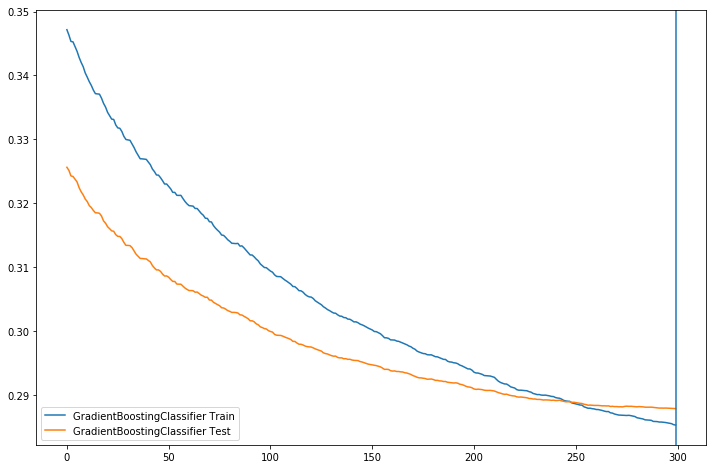

In [104]:
stage_score_plot(gbm1, X_train, y_train, X_test, y_test)

lowest test error(log loss): 0.2871141515907838
num_trees at lowest test error: 279


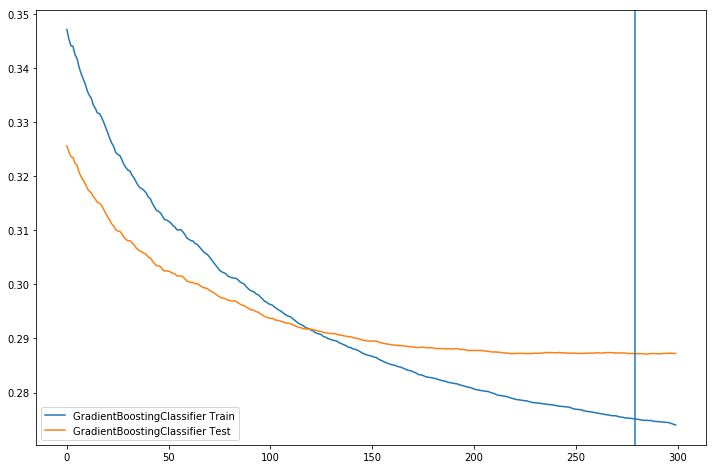

In [105]:
stage_score_plot(gbm2, X_train, y_train, X_test, y_test)

lowest test error(log loss): 0.28753591415508994
num_trees at lowest test error: 160


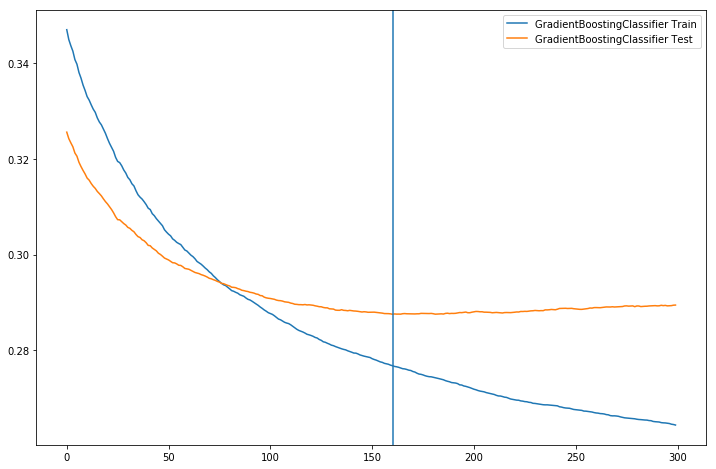

In [106]:
stage_score_plot(gbm3, X_train, y_train, X_test, y_test)

lowest test error(log loss): 0.2892805737364727
num_trees at lowest test error: 171


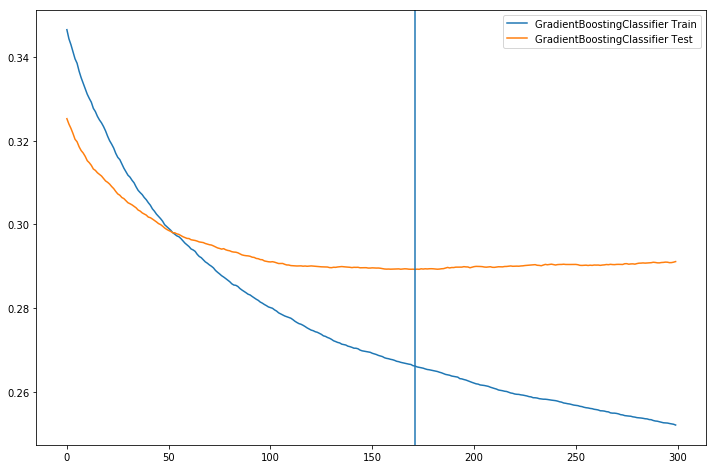

In [107]:
stage_score_plot(gbm4, X_train, y_train, X_test, y_test)

### XGBoost Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

In [108]:
X_train, X_test,indices_train,indices_test = train_test_split(data,indices, test_size=0.33, random_state=8)

y_train, y_test = y[indices_train],  y[indices_test]

In [109]:
xgb1 = XGBClassifier(learning_rate=0.01, n_estimators=200, random_state=8)
xgb2 = XGBClassifier(learning_rate=0.01, n_estimators=300, random_state=8)
xgb3 = XGBClassifier(learning_rate=0.01, n_estimators=400, random_state=8)
xgb4 = XGBClassifier(learning_rate=0.01, n_estimators=500, random_state=8)
xgb5 = XGBClassifier(learning_rate=0.01, n_estimators=600, random_state=8)

xgb1.fit(X_train, y_train)
xgb2.fit(X_train, y_train)
xgb3.fit(X_train, y_train)
xgb4.fit(X_train, y_train)
xgb5.fit(X_train, y_train)


xgb_p1 =  xgb1.predict_proba(X_test)
xgb_p2 =  xgb2.predict_proba(X_test)
xgb_p3 =  xgb3.predict_proba(X_test)
xgb_p4 =  xgb4.predict_proba(X_test)
xgb_p5 =  xgb5.predict_proba(X_test)



xgb1_ll = log_loss(y_test, xgb_p1)
xgb2_ll = log_loss(y_test, xgb_p2)
xgb3_ll = log_loss(y_test, xgb_p3)
xgb4_ll = log_loss(y_test, xgb_p4)
xgb5_ll = log_loss(y_test, xgb_p5)


print("XGB n_estimators: 200 log loss " + str(xgb1_ll))
print("XGB n_estimators: 300 log loss " + str(xgb2_ll))
print("XGB n_estimators: 400 log loss " + str(xgb3_ll))
print("XGB n_estimators: 500 log loss " + str(xgb4_ll))
print("XGB n_estimators: 600 log loss " + str(xgb5_ll))

XGB n_estimators: 200 log loss 0.30553182962838776
XGB n_estimators: 300 log loss 0.2919211085549338
XGB n_estimators: 400 log loss 0.28966823151737187
XGB n_estimators: 500 log loss 0.29027344755180146
XGB n_estimators: 600 log loss 0.2914646425128541


Best n_estimators of XGB: 400

# Re-run and test on holdout set with tuned parameters

In [111]:
#holding 20% of data for last test
columns = ['shot_distance', 'shot_angle', 'assisted_shot', 'is_penalty_attempt']
holdout = shots_df.sample(frac=.2, random_state=8)
holdout_x = holdout[columns]
holdout_y = holdout['is_goal']
indices_holdout = holdout.index.values

train = shots_df.drop(holdout.index).copy()
data = train[columns]
y = train['is_goal']
indices = train.index.values 

In [112]:
X_train, X_test,indices_train,indices_test = train_test_split(data,indices, test_size=0.33, random_state=8)

y_train, y_test = y[indices_train],  y[indices_test]

In [113]:
xgboost_model = XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 400, random_state=8)
gradient_boost_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, max_features='log2', min_samples_leaf=4, n_estimators=280, subsample=0.25, random_state=8)
random_forest_model = RandomForestClassifier(n_estimators=300, max_depth=3, verbose=1, random_state=8)

xgboost_model.fit(X_train, y_train)
gradient_boost_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

p_random_forest = random_forest_model.predict_proba(X_test)
p_gradient_boost =  gradient_boost_model.predict_proba(X_test)
p_xgboost = xgboost_model.predict_proba(X_test)

#need to concat these two arrays somehow...
ensemble_p_0 = (p_random_forest[:,0] + p_gradient_boost[:,0] + p_xgboost[:,0])/3
ensemble_p_1 = (p_random_forest[:,1] + p_gradient_boost[:,1] + p_xgboost[:,1])/3
# ensemble_p = np.concatenate(ensemble_p_0, ensemble_p_1, axis=0)

random_forest_ll = log_loss(y_test, p_random_forest)
gradient_boost_ll = log_loss(y_test, p_gradient_boost)
xgboost_ll = log_loss(y_test, p_xgboost)
ensemble_ll = log_loss(y_test, ensemble_p_1)
                                     

print("Ensemble Log Loss " + str(ensemble_ll))
print("Gradient Boost Log Loss " + str(gradient_boost_ll))
print("Random Forest Log Loss " + str(random_forest_ll))
print("XGBoost Log Loss " + str(xgboost_ll))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ensemble Log Loss 0.28642860194427205
Gradient Boost Log Loss 0.2871141515907838
Random Forest Log Loss 0.2861181033606787
XGBoost Log Loss 0.28966823151737187


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


### Testing on Holdout Set

In [114]:
p_random_forest = random_forest_model.predict_proba(holdout_x)
p_gradient_boost =  gradient_boost_model.predict_proba(holdout_x)
p_xgboost = xgboost_model.predict_proba(holdout_x)

#need to concat these two arrays somehow...
ensemble_p_0 = (p_random_forest[:,0] + p_gradient_boost[:,0] + p_xgboost[:,0])/3
ensemble_p_1 = (p_random_forest[:,1] + p_gradient_boost[:,1] + p_xgboost[:,1])/3
# ensemble_p = np.concatenate(ensemble_p_0, ensemble_p_1, axis=0)

random_forest_ll = log_loss(holdout_y, p_random_forest)
gradient_boost_ll = log_loss(holdout_y, p_gradient_boost)
xgboost_ll = log_loss(holdout_y, p_xgboost)
ensemble_ll = log_loss(holdout_y, ensemble_p_1)
                                     

print("Ensemble Log Loss " + str(ensemble_ll))
print("Gradient Boost Log Loss " + str(gradient_boost_ll))
print("Random Forest Log Loss " + str(random_forest_ll))
print("XGBoost Log Loss " + str(xgboost_ll))

Ensemble Log Loss 0.3211588479932041
Gradient Boost Log Loss 0.32320781028048234
Random Forest Log Loss 0.3216486684836253
XGBoost Log Loss 0.3219990956839689


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [115]:
import pickle

rf_pkl_filename = 'rfc.pkl'
rf_pkl = open(rf_pkl_filename, 'wb')
pickle.dump(random_forest_model, rf_pkl)
rf_pkl.close()

gb_pkl_filename = 'gb.pkl'
gb_pkl = open(gb_pkl_filename, 'wb')
pickle.dump(gradient_boost_model, gb_pkl)
gb_pkl.close()

xgb_pkl_filename = 'xgb.pkl'
xgb_pkl = open(xgb_pkl_filename, 'wb')
pickle.dump(xgboost_model, xgb_pkl)
xgb_pkl.close()

# Predict on Complete Data Set and Add xG

In [116]:
from model_prep import create_rf_prep, create_xG_df, create_summed_xG_df

In [117]:
model_ready_df = create_rf_prep(shots_df)
model_ready_df.head()

,player_id,shot_distance,shot_angle,assisted_shot,is_penalty_attempt
0,99779.0,6.838786,12.755990,1.0,0.0
1,60730.0,21.747333,11.242763,0.0,0.0
2,177285.0,12.000000,0.000000,0.0,1.0
3,185745.0,16.803407,59.849102,1.0,0.0
4,77892.0,26.220122,32.065607,0.0,0.0


In [118]:
rf_model = pickle.load(open("rfc.pkl", "rb"))
gb_model = pickle.load(open("gb.pkl", "rb"))
xgb_model = pickle.load(open("xgb.pkl", "rb"))

In [119]:
columns = ['shot_distance', 'shot_angle', 'assisted_shot', 'is_penalty_attempt']

In [120]:
p_random_forest = rf_model.predict_proba(model_ready_df[columns])
p_gradient_boost =  gb_model.predict_proba(model_ready_df[columns])
p_xgboost = xgb_model.predict_proba(model_ready_df[columns])
p_ensemble = (p_random_forest + p_gradient_boost + p_xgboost) / 3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


## Aggregate

In [309]:
rf_xg.head()

,player_id,shot_distance,shot_angle,assisted_shot,is_penalty_attempt,is_goal,xG,xA
0,99779.0,6.838786,12.755990,1.0,0.0,1.0,0.461881,0.461881
1,60730.0,21.747333,11.242763,0.0,0.0,0.0,0.057310,0.000000
2,177285.0,12.000000,0.000000,0.0,1.0,1.0,0.895402,0.000000
3,185745.0,16.803407,59.849102,1.0,0.0,0.0,0.067884,0.067884
4,77892.0,26.220122,32.065607,0.0,0.0,0.0,0.054817,0.000000


In [240]:
rf_xg = create_xG_df(model_ready_df, shots_df['is_goal'], p_random_forest)
rf_contributions = create_summed_xG_df(rf_xg)

gb_xg = create_xG_df(model_ready_df, shots_df['is_goal'], p_gradient_boost)
gb_contributions = create_summed_xG_df(gb_xg)

xgb_xg = create_xG_df(model_ready_df, shots_df['is_goal'], p_xgboost)
xgb_contributions = create_summed_xG_df(xgb_xg)

ensemble_xg = create_xG_df(model_ready_df, shots_df['is_goal'], p_ensemble)
ensemble_contributions = create_summed_xG_df(ensemble_xg)

In [241]:
rf_contributions.head()

,player_id,total_xG,total_xA,total_xG+xA,pen_attempts,goals
0,16081.0,6.40,1.57,7.97,4.0,8.0
1,488.0,5.79,1.14,6.93,3.0,11.0
2,24256.0,5.55,2.48,8.03,0.0,12.0
3,20195.0,5.35,1.06,6.41,1.0,5.0
4,31939.0,4.39,1.26,5.65,1.0,5.0


In [242]:
gb_contributions.head()

,player_id,total_xG,total_xA,total_xG+xA,pen_attempts,goals
0,24256.0,6.01,2.71,8.72,0.0,12.0
1,16081.0,5.99,1.61,7.60,4.0,8.0
2,20195.0,5.71,1.23,6.94,1.0,5.0
3,488.0,5.59,1.22,6.81,3.0,11.0
4,17217.0,4.51,1.38,5.89,0.0,3.0


In [243]:
xgb_contributions.head()

,player_id,total_xG,total_xA,total_xG+xA,pen_attempts,goals
0,24256.0,6.59,2.85,9.44,0.0,12.0
1,16081.0,6.38,1.56,7.94,4.0,8.0
2,20195.0,6.19,1.37,7.56,1.0,5.0
3,488.0,6.16,1.09,7.25,3.0,11.0
4,31939.0,5.06,1.52,6.58,1.0,5.0


In [244]:
ensemble_contributions.head()

,player_id,total_xG,total_xA,total_xG+xA,pen_attempts,goals
0,16081.0,6.26,1.58,7.84,4.0,8.0
1,24256.0,6.05,2.68,8.73,0.0,12.0
2,488.0,5.85,1.15,7.00,3.0,11.0
3,20195.0,5.75,1.22,6.97,1.0,5.0
4,31939.0,4.64,1.39,6.03,1.0,5.0


In [247]:
rf_sl = pd.merge(rf_contributions, final_df, on=['player_id'])
gb_sl = pd.merge(gb_contributions, final_df, on=['player_id'])
xgb_sl = pd.merge(xgb_contributions, final_df, on=['player_id'])
ens_sl = pd.merge(ensemble_contributions, final_df, on=['player_id'])

In [248]:
rf_sl.head()

,player_id,total_xG,total_xA,total_xG+xA,pen_attempts,goals,player_name,club,birthday,age,foot,position_id,squad_num,height,total_minutes_played,transfer_value(sterlings),transfer_value(USD)
0,16081.0,6.40,1.57,7.97,4.0,8.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,"1,67 m",917.900000,£1.35m,1.71
1,488.0,5.79,1.14,6.93,3.0,11.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,"1,74 m",1118.533333,£1.58m,2.01
2,24256.0,5.55,2.48,8.03,0.0,12.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,"1,87 m",1247.966667,£2.70m,3.43
3,20195.0,5.35,1.06,6.41,1.0,5.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,"1,87 m",1166.283333,£1.35m,1.71
4,31939.0,4.39,1.26,5.65,1.0,5.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,"1,81 m",1159.566667,£5.40m,6.86


In [144]:
rf_sl['xG+xA/90'] = round(rf_sl['total_xG+xA'] / (rf_sl['total_minutes_played'] / 90 ), 2)
gb_sl['xG+xA/90'] = round(gb_sl['total_xG+xA'] / (gb_sl['total_minutes_played'] / 90 ), 2)
xgb_sl['xG+xA/90'] = round(xgb_sl['total_xG+xA'] / (xgb_sl['total_minutes_played'] / 90 ), 2)
ens_sl['xG+xA/90'] = round(ens_sl['total_xG+xA'] / (ens_sl['total_minutes_played'] / 90 ), 2)

rf_sl['xG_goal_diff'] = round(rf_sl['goals'] - (rf_sl['total_xG']), 2)
gb_sl['xG_goal_diff'] = round(gb_sl['goals'] - (gb_sl['total_xG']), 2)
xgb_sl['xG_goal_diff'] = round(xgb_sl['goals'] - (xgb_sl['total_xG']), 2)
ens_sl['xG_goal_diff'] = round(ens_sl['goals'] - (ens_sl['total_xG']), 2)

In [145]:
final_col = ['player_id', 'player_name', 'club', 'birthday', 'age', 'foot', 'position_id', 'squad_num',
       'total_xG', 'total_xA', 'total_xG+xA', 'goals', 'xG_goal_diff', 'xG+xA/90', 'transfer_value(USD)', 'total_minutes_played']

rf_df = rf_sl[final_col]
gb_df = gb_sl[final_col]
xgb_df = xgb_sl[final_col]
ens_df = ens_sl[final_col]

In [146]:
rf_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
0,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,6.40,1.57,7.97,8.0,1.60,0.78,1.71,917.900000
1,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,5.79,1.14,6.93,11.0,5.21,0.56,2.01,1118.533333
2,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,5.55,2.48,8.03,12.0,6.45,0.58,3.43,1247.966667
3,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,5.35,1.06,6.41,5.0,-0.35,0.49,1.71,1166.283333
4,31939.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,4.39,1.26,5.65,5.0,0.61,0.44,6.86,1159.566667


In [147]:
gb_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
0,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,6.01,2.71,8.72,12.0,5.99,0.63,3.43,1247.966667
1,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,5.99,1.61,7.60,8.0,2.01,0.75,1.71,917.900000
2,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,5.71,1.23,6.94,5.0,-0.71,0.54,1.71,1166.283333
3,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,5.59,1.22,6.81,11.0,5.41,0.55,2.01,1118.533333
4,17217.0,Jonatan Cristaldo,Squad Racing Club,"Mar 5, 1989 (29)",29,right,Forward,9.0,4.51,1.38,5.89,3.0,-1.51,0.56,1.37,944.966667


In [148]:
xgb_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
0,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,6.59,2.85,9.44,12.0,5.41,0.68,3.43,1247.966667
1,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,6.38,1.56,7.94,8.0,1.62,0.78,1.71,917.900000
2,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,6.19,1.37,7.56,5.0,-1.19,0.58,1.71,1166.283333
3,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,6.16,1.09,7.25,11.0,4.84,0.58,2.01,1118.533333
4,31939.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,5.06,1.52,6.58,5.0,-0.06,0.51,6.86,1159.566667


In [149]:
ens_df.head(20)

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
0,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,6.26,1.58,7.84,8.0,1.74,0.77,1.71,917.900000
1,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,6.05,2.68,8.73,12.0,5.95,0.63,3.43,1247.966667
2,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,5.85,1.15,7.00,11.0,5.15,0.56,2.01,1118.533333
3,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,5.75,1.22,6.97,5.0,-0.75,0.54,1.71,1166.283333
4,31939.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,4.64,1.39,6.03,5.0,0.36,0.47,6.86,1159.566667
5,17217.0,Jonatan Cristaldo,Squad Racing Club,"Mar 5, 1989 (29)",29,right,Forward,9.0,4.49,1.41,5.90,3.0,-1.49,0.56,1.37,944.966667
6,101.0,Darío Cvitanich,Squad Club Atlético Banfield,"May 16, 1984 (34)",34,right,Forward,20.0,4.41,0.86,5.27,5.0,0.59,0.42,1.71,1141.550000
7,15113.0,Claudio Bieler,Squad Club Atlético San Martín (Tucumán),"Mar 1, 1984 (34)",34,right,Forward,9.0,4.12,1.02,5.14,3.0,-1.12,0.34,0.57,1349.016667
8,203.0,Mariano Pavone,Squad Club Estudiantes de La Plata,"May 27, 1982 (36)",36,both,Forward,16.0,4.10,1.94,6.04,3.0,-1.10,0.67,0.46,814.650000
9,39414.0,Fernando Zampedri,Squad Club Atlético Rosario Central,"Feb 14, 1988 (30)",30,right,Forward,20.0,4.09,2.62,6.71,4.0,-0.09,0.63,3.43,966.066667


# Create One Function that Does All the Above

In [150]:
from table_creator import create_complete_xg_tables

In [249]:
rf_df, gb_df, xgb_df, ens_df = create_complete_xg_tables()

/Users/david/galvanize/super_liga_xg/mongo_to_db.py:69: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  final_df = pd.concat([attach_to_df, df], axis=0, ignore_index=True)
/Users/david/galvanize/super_liga_xg/dataframe_cleaner.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  input_df['is_goal'] = input_df.loc[:, 'shot_type'].isin([9, 11, 12, 13]).astype(int)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


In [250]:
rf_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,pen_attempts,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
0,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,6.40,4.0,1.57,7.97,8.0,1.60,0.78,1.71,917.90
1,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,5.79,3.0,1.14,6.93,11.0,5.21,0.56,2.01,1118.53
2,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,5.55,0.0,2.48,8.03,12.0,6.45,0.58,3.43,1247.97
3,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,5.35,1.0,1.06,6.41,5.0,-0.35,0.49,1.71,1166.28
4,31939.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,4.39,1.0,1.26,5.65,5.0,0.61,0.44,6.86,1159.57


In [251]:
gb_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,pen_attempts,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
0,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,6.01,0.0,2.71,8.72,12.0,5.99,0.63,3.43,1247.97
1,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,5.99,4.0,1.61,7.60,8.0,2.01,0.75,1.71,917.90
2,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,5.71,1.0,1.23,6.94,5.0,-0.71,0.54,1.71,1166.28
3,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,5.59,3.0,1.22,6.81,11.0,5.41,0.55,2.01,1118.53
4,17217.0,Jonatan Cristaldo,Squad Racing Club,"Mar 5, 1989 (29)",29,right,Forward,9.0,4.51,0.0,1.38,5.89,3.0,-1.51,0.56,1.37,944.97


In [252]:
xgb_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,pen_attempts,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
0,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,6.59,0.0,2.85,9.44,12.0,5.41,0.68,3.43,1247.97
1,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,6.38,4.0,1.56,7.94,8.0,1.62,0.78,1.71,917.90
2,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,6.19,1.0,1.37,7.56,5.0,-1.19,0.58,1.71,1166.28
3,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,6.16,3.0,1.09,7.25,11.0,4.84,0.58,2.01,1118.53
4,31939.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,5.06,1.0,1.52,6.58,5.0,-0.06,0.51,6.86,1159.57


In [273]:
ens_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,pen_attempts,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
0,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,6.26,4.0,1.58,7.84,8.0,1.74,0.77,1.71,917.90
1,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,6.05,0.0,2.68,8.73,12.0,5.95,0.63,3.43,1247.97
2,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,5.85,3.0,1.15,7.00,11.0,5.15,0.56,2.01,1118.53
3,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,5.75,1.0,1.22,6.97,5.0,-0.75,0.54,1.71,1166.28
4,31939.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,4.64,1.0,1.39,6.03,5.0,0.36,0.47,6.86,1159.57


# Exploration

In [333]:
xgb_df.head()

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,pen_attempts,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
0,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,6.59,0.0,2.85,9.44,12.0,5.41,0.68,3.43,1247.97
1,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,6.38,4.0,1.56,7.94,8.0,1.62,0.78,1.71,917.90
2,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,6.19,1.0,1.37,7.56,5.0,-1.19,0.58,1.71,1166.28
3,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,6.16,3.0,1.09,7.25,11.0,4.84,0.58,2.01,1118.53
4,31939.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,5.06,1.0,1.52,6.58,5.0,-0.06,0.51,6.86,1159.57


In [334]:
xgb_df.to_csv('xgb_df.csv')

### for first page bar graphs

In [311]:
print(rf_df['total_xG'].sum())
print(gb_df['total_xG'].sum())
print(xgb_df['total_xG'].sum())
print(ens_df['total_xG'].sum())

377.83000000000004
383.53
406.53999969922006
389.29


In [328]:
shots_df['xG'] = p_xgboost[:, 1]
shots_df['xG'] = round(shots_df['xG'], 2)

In [329]:
shots_df.head()

,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,corner_kick,shot_distance,shot_angle,assisted_shot,is_penalty_attempt,is_goal,xG
0,448548,99779.0,6.67,0.00,1.51,-1.21,-1,0.83,22336297,11,20,1.033333,177285.0,0.89,12.44,29.36,-4.84,-1.0,-1.0,1.0,6.838786,12.755990,1.0,0.0,1.0,0.50
1,448548,60730.0,21.33,12.00,4.24,-0.91,-1,0.73,22336386,35,20,9.683333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.747333,11.242763,0.0,0.0,0.0,0.04
2,448548,177285.0,12.00,1.78,0.00,-3.03,-1,0.21,22336583,13,20,26.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.000000,0.000000,0.0,1.0,1.0,0.91
3,448548,185745.0,8.44,0.89,14.53,-6.66,-1,-1.00,22336723,33,20,38.883333,177285.0,22.67,6.22,3.93,19.67,-1.0,-1.0,0.0,16.803407,59.849102,1.0,0.0,0.0,0.05
4,448548,77892.0,22.22,0.44,13.92,-8.48,-1,-1.00,22336739,33,13,40.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.220122,32.065607,0.0,0.0,0.0,0.03


In [303]:
shots_df[shots_df['is_penalty_attempt'] == 1.0]['xG'].mean()

0.914911150932312

In [304]:
shots_df[shots_df['is_penalty_attempt'] == 0.0]['xG'].mean()

0.1109292134642601

In [305]:
shots_df[(shots_df['is_goal'] == 1.0) & (shots_df['is_penalty_attempt'] == 0.0)]['xG'].mean()

0.2184222936630249

In [306]:
shots_df[(shots_df['is_goal'] == 0.0) & (shots_df['is_penalty_attempt'] == 0.0)]['xG'].mean()

0.09890320897102356

In [307]:
shots_df[(shots_df['is_penalty_attempt'] == 0.0) & (shots_df['assisted_shot'] == 0.0)]['xG'].mean()

0.10517752170562744

In [308]:
shots_df[ (shots_df['assisted_shot'] == 1.0)]['xG'].mean()

0.12013944238424301

### for top scorers

functions in analysis.py

In [7]:
from analysis import plot_shot_map, individual_shot_map, plot_goals_map

In [181]:
top_scorers = ens_df.sort_values(by=['goals'], ascending=False).head(20).copy() 

In [195]:
scoring_20_id = top_scorers['player_id'].unique()
everyone_id = ens_df['player_id'].unique()

In [190]:
shots_per_game = []
for player_id in scoring_20_id:
    games_played = len(shots_df[shots_df['player_id'] == player_id]['game_id'].unique())
    total_shots = len(shots_df[shots_df['player_id'] == player_id])
    spg = round(total_shots/games_played, 2)
    shots_per_game.append(spg)
np.mean(shots_per_game)

2.276

In [201]:
shots_per_game = []
for player_id in everyone_id:
    games_played = len(shots_df[shots_df['player_id'] == player_id]['game_id'].unique())
    total_shots = len(shots_df[shots_df['player_id'] == player_id])
    spg = round(total_shots/games_played, 2)
    shots_per_game.append(spg)
np.mean(shots_per_game)

1.4934374999999998

In [312]:
shots_df[~shots_df['player_id'].isin(scoring_20_id)]['xG'].mean()

0.11314049363136292

In [313]:
shots_df[shots_df['player_id'].isin(scoring_20_id)]['xG'].mean()

0.1660216897726059

In [314]:
shots_df[shots_df['player_id'].isin(scoring_20_id)]['shot_distance'].mean()

15.319534658952188

In [315]:
shots_df[~shots_df['player_id'].isin(scoring_20_id)]['shot_distance'].mean()

18.037816041765875

In [318]:
xgb_df[ens_df['player_name'] == 'Carlos Tevez']

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,pen_attempts,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
38,167990.0,Luís Leal,Squad Club Atlético Newell's Old Boys,"May 29, 1987 (31)",31,right,Forward,7.0,2.25,0.0,1.61,3.86,1.0,-1.25,0.41,1.37,842.68


In [319]:
xgb_df[(xgb_df['age'] <= 25) & (xgb_df['xG+xA/90'] > 0.3)].head(10)

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,pen_attempts,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
8,93853.0,Franco Soldano,Squad Club Atlético Unión (Santa Fe),"Sep 14, 1994 (24)",24,right,Forward,27.0,4.42,0.0,1.91,6.33,2.0,-2.42,0.46,5.71,1240.35
11,98292.0,Facundo Barceló,Squad Club Atlético Patronato de la Juventud C...,"Mar 31, 1993 (25)",25,right,Forward,31.0,4.02,1.0,1.58,5.60,6.0,1.98,0.73,0.57,688.92
13,135386.0,Leonardo Sequeira,Squad Club Atlético Belgrano,"Apr 26, 1995 (23)",23,right,Forward,26.0,3.84,2.0,0.40,4.24,2.0,-1.84,0.38,1.71,1000.88
14,193188.0,Gastón Togni,Squad Club Social y Deportivo Defensa y Justicia,"Sep 20, 1997 (21)",21,left,Midfielder,7.0,3.46,0.0,1.15,4.61,3.0,-0.46,0.37,0.17,1115.33
18,172565.0,Nicolás Reniero,Squad Club Atlético San Lorenzo de Almagro,"Mar 18, 1995 (23)",23,right,Forward,15.0,3.29,0.0,2.13,5.42,3.0,-0.29,0.46,2.29,1057.33
19,87323.0,Ricardo Centurión,Squad Racing Club,"Jan 19, 1993 (25)",25,right,Forward,10.0,3.16,1.0,1.31,4.47,3.0,-0.16,0.51,5.71,787.35
20,114108.0,Nicolás Fernández,Squad Club Social y Deportivo Defensa y Justicia,"Feb 8, 1996 (22)",22,right,Forward,29.0,3.15,0.0,1.78,4.93,4.0,0.85,0.43,3.43,1023.72
26,163041.0,Alexander Barboza,Squad Club Social y Deportivo Defensa y Justicia,"Mar 16, 1995 (23)",23,left,Defender,6.0,2.92,1.0,1.37,4.29,1.0,-1.92,0.35,2.86,1090.52
27,117606.0,Junior Arias,Squad Club Atlético Talleres,"May 17, 1993 (25)",25,right,Forward,9.0,2.78,0.0,1.07,3.85,4.0,1.22,0.35,2.29,982.67
28,121341.0,Héctor Fértoli,Squad Club Atlético Newell's Old Boys,"Dec 3, 1994 (24)",24,right,Midfielder,26.0,2.58,0.0,1.22,3.80,4.0,1.42,0.34,0.80,1019.45


In [336]:
test = pd.read_csv('xgb_df.csv')

In [337]:
test.head()

,Unnamed: 0,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,pen_attempts,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
0,0,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,6.59,0.0,2.85,9.44,12.0,5.41,0.68,3.43,1247.97
1,1,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,6.38,4.0,1.56,7.94,8.0,1.62,0.78,1.71,917.90
2,2,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,6.19,1.0,1.37,7.56,5.0,-1.19,0.58,1.71,1166.28
3,3,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,6.16,3.0,1.09,7.25,11.0,4.84,0.58,2.01,1118.53
4,4,31939.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,5.06,1.0,1.52,6.58,5.0,-0.06,0.51,6.86,1159.57


In [320]:
xgb_df[xgb_df['player_id'] == 93853.0]['player_name'].iloc[0]

'Franco Soldano'

In [332]:
shots_df.head()

,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,corner_kick,shot_distance,shot_angle,assisted_shot,is_penalty_attempt,is_goal,xG
0,448548,99779.0,6.67,0.00,1.51,-1.21,-1,0.83,22336297,11,20,1.033333,177285.0,0.89,12.44,29.36,-4.84,-1.0,-1.0,1.0,6.838786,12.755990,1.0,0.0,1.0,0.50
1,448548,60730.0,21.33,12.00,4.24,-0.91,-1,0.73,22336386,35,20,9.683333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.747333,11.242763,0.0,0.0,0.0,0.04
2,448548,177285.0,12.00,1.78,0.00,-3.03,-1,0.21,22336583,13,20,26.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.000000,0.000000,0.0,1.0,1.0,0.91
3,448548,185745.0,8.44,0.89,14.53,-6.66,-1,-1.00,22336723,33,20,38.883333,177285.0,22.67,6.22,3.93,19.67,-1.0,-1.0,0.0,16.803407,59.849102,1.0,0.0,0.0,0.05
4,448548,77892.0,22.22,0.44,13.92,-8.48,-1,-1.00,22336739,33,13,40.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.220122,32.065607,0.0,0.0,0.0,0.03


In [353]:
youngsters = xgb_df[(xgb_df['xG+xA/90'] >=.3) & (xgb_df['age'] <=25)]
youngsters.head(20)

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,pen_attempts,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
8,93853.0,Franco Soldano,Squad Club Atlético Unión (Santa Fe),"Sep 14, 1994 (24)",24,right,Forward,27.0,4.42,0.0,1.91,6.33,2.0,-2.42,0.46,5.71,1240.35
11,98292.0,Facundo Barceló,Squad Club Atlético Patronato de la Juventud C...,"Mar 31, 1993 (25)",25,right,Forward,31.0,4.02,1.0,1.58,5.60,6.0,1.98,0.73,0.57,688.92
13,135386.0,Leonardo Sequeira,Squad Club Atlético Belgrano,"Apr 26, 1995 (23)",23,right,Forward,26.0,3.84,2.0,0.40,4.24,2.0,-1.84,0.38,1.71,1000.88
14,193188.0,Gastón Togni,Squad Club Social y Deportivo Defensa y Justicia,"Sep 20, 1997 (21)",21,left,Midfielder,7.0,3.46,0.0,1.15,4.61,3.0,-0.46,0.37,0.17,1115.33
18,172565.0,Nicolás Reniero,Squad Club Atlético San Lorenzo de Almagro,"Mar 18, 1995 (23)",23,right,Forward,15.0,3.29,0.0,2.13,5.42,3.0,-0.29,0.46,2.29,1057.33
19,87323.0,Ricardo Centurión,Squad Racing Club,"Jan 19, 1993 (25)",25,right,Forward,10.0,3.16,1.0,1.31,4.47,3.0,-0.16,0.51,5.71,787.35
20,114108.0,Nicolás Fernández,Squad Club Social y Deportivo Defensa y Justicia,"Feb 8, 1996 (22)",22,right,Forward,29.0,3.15,0.0,1.78,4.93,4.0,0.85,0.43,3.43,1023.72
26,163041.0,Alexander Barboza,Squad Club Social y Deportivo Defensa y Justicia,"Mar 16, 1995 (23)",23,left,Defender,6.0,2.92,1.0,1.37,4.29,1.0,-1.92,0.35,2.86,1090.52
27,117606.0,Junior Arias,Squad Club Atlético Talleres,"May 17, 1993 (25)",25,right,Forward,9.0,2.78,0.0,1.07,3.85,4.0,1.22,0.35,2.29,982.67
28,121341.0,Héctor Fértoli,Squad Club Atlético Newell's Old Boys,"Dec 3, 1994 (24)",24,right,Midfielder,26.0,2.58,0.0,1.22,3.80,4.0,1.42,0.34,0.80,1019.45


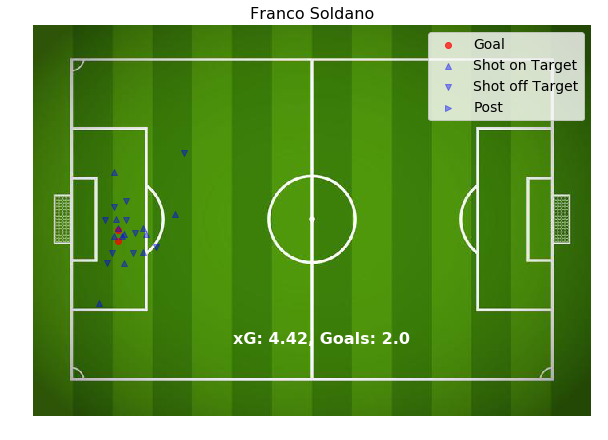

In [35]:
individual_shot_map(shots_df, 93853.0)

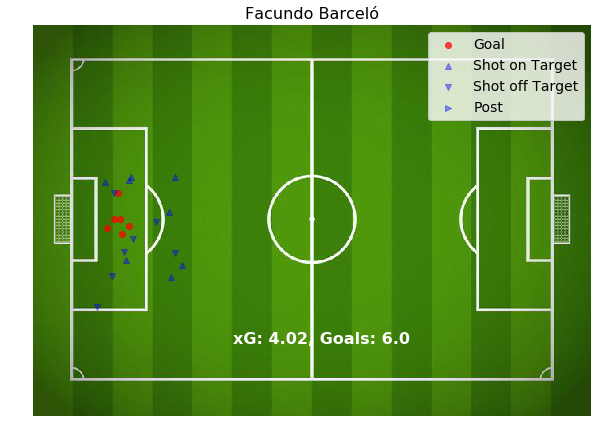

In [36]:
individual_shot_map(shots_df, 98292.0)

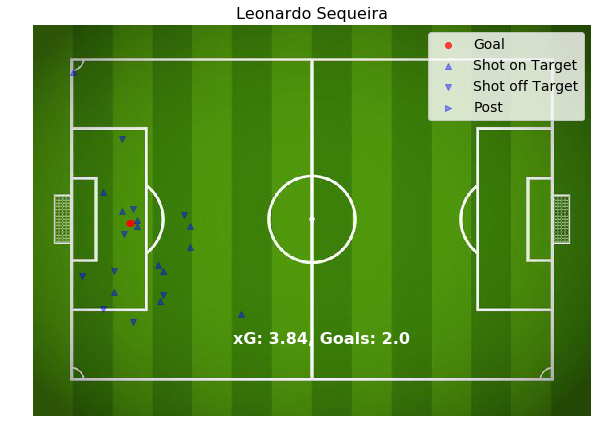

In [37]:
individual_shot_map(shots_df, 135386.0)

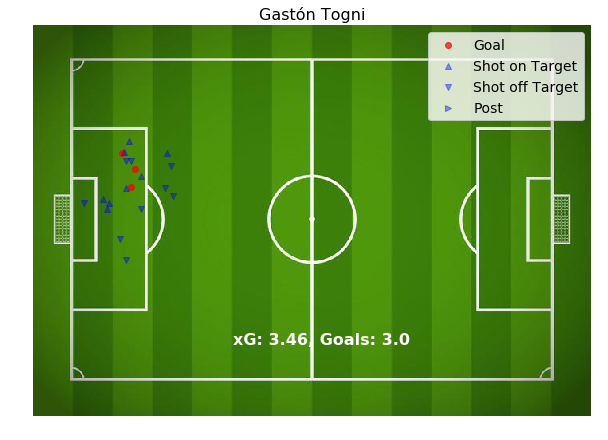

In [38]:
individual_shot_map(shots_df, 193188.0)

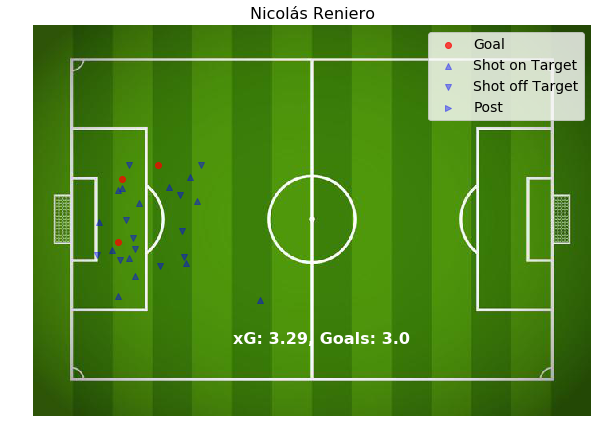

In [39]:
individual_shot_map(shots_df, 172565.0)

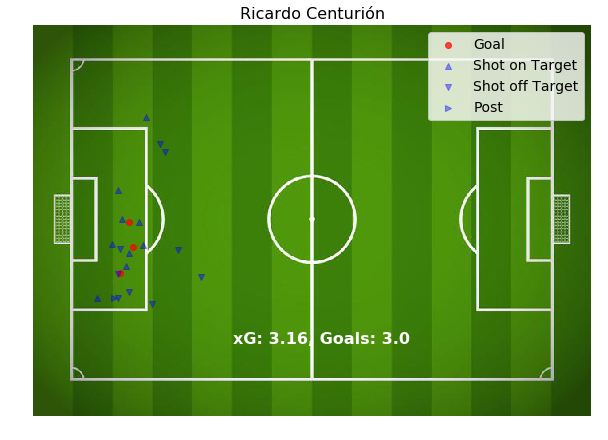

In [40]:
individual_shot_map(shots_df, 87323.0)

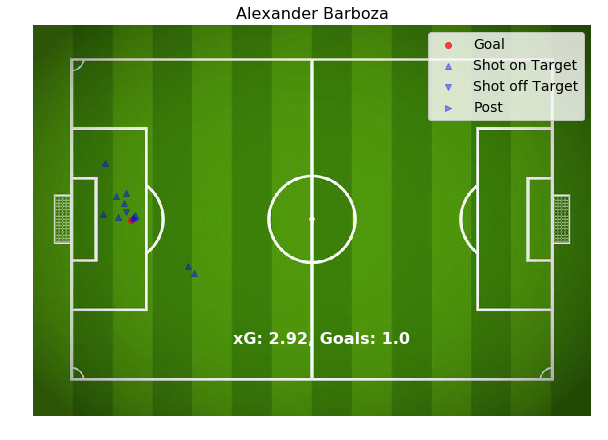

In [41]:
individual_shot_map(shots_df, 163041.0	)

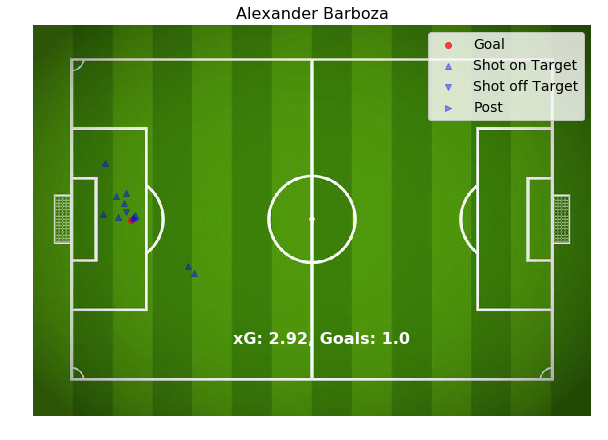

In [42]:
individual_shot_map(shots_df, 163041.0)

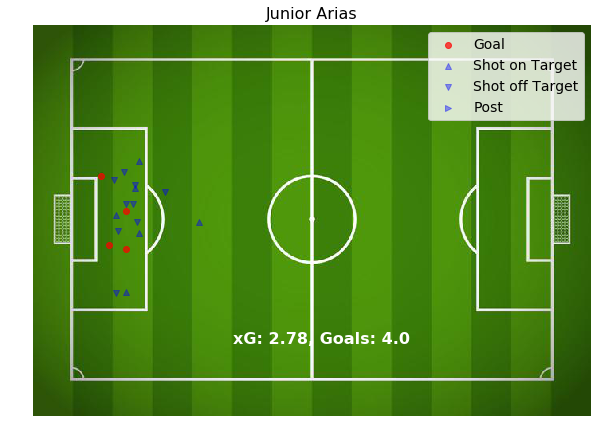

In [43]:
individual_shot_map(shots_df, 117606.0)

In [366]:
lowest_prob_goals = shots_df[(shots_df['is_goal']==1.0)].sort_values(by=['xG']).head(20).copy()
highest_prob_goals = shots_df[(shots_df['is_goal']==1.0) & (shots_df['is_penalty_attempt'] == 0)].sort_values(by=['xG'], ascending=False).head(20).copy()

In [368]:
print(lowest_prob_goals['xG'].mean())
highest_prob_goals['xG'].mean()

0.03750000149011612


0.5635000467300415

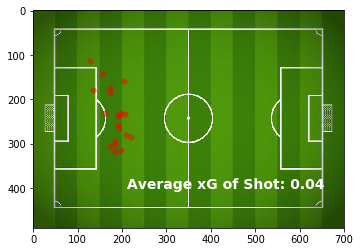

In [370]:
plot_goals_map(lowest_prob_goals, 0.04 )

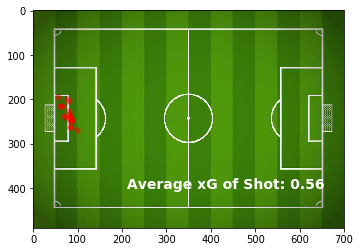

In [371]:
plot_goals_map(highest_prob_goals, 0.56 )

In [237]:
top_20_scorers = ens_df.sort_values(by=['goals'], ascending=False).head(20)

In [238]:
top_20_scorers

,player_id,player_name,club,birthday,age,foot,position_id,squad_num,total_xG,total_xA,total_xG+xA,goals,xG_goal_diff,xG+xA/90,transfer_value(USD),total_minutes_played
1,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,Forward,9.0,6.05,2.68,8.73,12.0,5.95,0.63,3.43,1247.97
2,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,Forward,15.0,5.85,1.15,7.00,11.0,5.15,0.56,2.01,1118.53
0,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,Forward,7.0,6.26,1.58,7.84,8.0,1.74,0.77,1.71,917.90
12,98292.0,Facundo Barceló,Squad Club Atlético Patronato de la Juventud C...,"Mar 31, 1993 (25)",25,right,Forward,31.0,3.77,1.45,5.22,6.0,2.23,0.68,0.57,688.92
56,119431.0,Matías Rojas,Squad Club Social y Deportivo Defensa y Justicia,"Nov 3, 1995 (23)",23,left,Midfielder,26.0,1.71,0.66,2.37,6.0,4.29,0.24,0.34,875.52
15,30266.0,Cristian Chávez,Squad Club Atlético Aldosivi,"Jun 4, 1987 (31)",31,right,Forward,11.0,3.26,0.93,4.19,5.0,1.74,0.35,0.57,1088.27
53,136659.0,Ángel González,Squad Club Deportivo Godoy Cruz Antonio Tomba,"May 16, 1994 (24)",24,right,Forward,8.0,1.85,0.84,2.69,5.0,3.15,0.26,2.86,913.78
32,172801.0,Nahuel Bustos,Squad Club Atlético Talleres,"Jul 4, 1998 (20)",20,right,Forward,7.0,2.30,0.91,3.21,5.0,2.70,0.34,0.06,857.90
4,31939.0,Santiago García,Squad Club Deportivo Godoy Cruz Antonio Tomba,"Sep 14, 1990 (28)",28,right,Forward,18.0,4.64,1.39,6.03,5.0,0.36,0.47,6.86,1159.57
3,20195.0,Sebastián Ribas,Squad Club Atlético Lanús,"Mar 11, 1988 (30)",30,right,Forward,37.0,5.75,1.22,6.97,5.0,-0.75,0.54,1.71,1166.28
